In [1]:
# import libraries
import piplite
await piplite.install('seaborn')

import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# open the first file
url = r"Customer_Segmentation.csv"
df = pd.read_csv(url) #to loud file
df

,user_id,age,sex,phone_number,joined_date,country,payment_method,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,...,return_date,order_id,released_date,estimated_delivery_date,received_date,total_delivery_days,shipping_method,shipping_cost,tracking_number,customer_exp_rating
0,****980545,22,M,63**409216**,2023-02-14,Philippines,maya,1,1,2.0,...,NaN,***621668,2024-04-03,2024-04-07,2024-04-07,8,standard,203,***5E7HOXAW93,3
1,****906406,23,M,63**369756**,2024-04-19,Philippines,visa_c,0,0,NaN,...,NaN,***002517,2024-04-26,2024-05-03,2024-05-04,6,standard,291,***R5NLL0ARWI,1
2,****860958,19,F,63**558004**,2023-03-03,Philippines,gcash,0,0,NaN,...,NaN,***050582,2024-01-28,2024-01-31,2024-02-01,11,standard,74,***EOVA6EJ4QO,1
3,****845150,58,O,63**783910**,2024-04-18,Philippines,otc,0,0,NaN,...,NaN,***110492,2024-06-09,2024-06-15,2024-06-13,8,express,82,***WKCU4XAR9B,1
4,****664897,37,O,63**600892**,2021-09-29,Philippines,visa_d,0,0,NaN,...,NaN,***201483,2022-07-08,2022-07-12,2022-07-09,14,standard,51,***5DEMJF3UCZ,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382418,****300037,30,O,63**379179**,2022-03-20,Philippines,grabpay,0,0,NaN,...,NaN,***025200,2024-06-11,2024-06-13,2024-06-12,10,express,210,***3QPIC2XR30,1
382419,****260855,34,O,63**733642**,2022-10-12,Philippines,maya,1,0,1.0,...,NaN,***627156,2022-11-18,2022-11-22,2022-11-21,11,standard,155,***67DDXCKCLL,1
382420,****953217,50,M,63**868843**,2021-06-27,Philippines,amex,0,0,NaN,...,NaN,***147206,2022-07-28,2022-07-29,2022-07-27,3,standard,246,***3QUHLZDFTG,3
382421,****196851,26,M,63**333114**,2022-08-24,Philippines,coinsph,1,2,3.0,...,NaN,***891420,2023-07-03,2023-07-04,2023-07-01,8,express,258,***ONNPLJ5925,4


In [3]:
# Data Informations
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382423 entries, 0 to 382422
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   user_id                        382423 non-null  object 
 1   age                            382423 non-null  int64  
 2   sex                            382423 non-null  object 
 3   phone_number                   382423 non-null  object 
 4   joined_date                    382423 non-null  object 
 5   country                        382423 non-null  object 
 6   payment_method                 382423 non-null  object 
 7   loyalty_program_member         382423 non-null  int64  
 8   loyalty_points_redeemed        382423 non-null  int64  
 9   loyalty_tier                   191126 non-null  float64
 10  tier_discount_percentage       191126 non-null  float64
 11  card_discount_percentage       88589 non-null   float64
 12  coupon_discount_percentage    

,age,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,tier_discount_percentage,card_discount_percentage,coupon_discount_percentage,total_discount_percentage,total_purchase,total_discount,total_purchase_after_discount,refund_amount,return_date,total_delivery_days,shipping_cost,customer_exp_rating
count,382423.000000,382423.000000,382423.000000,191126.000000,191126.000000,88589.000000,382423.000000,382423.000000,382423.000000,382423.000000,382423.000000,382423.0,0.0,382423.000000,382423.000000,382423.000000
mean,38.972808,0.499776,2.259464,2.501753,6.254419,2.993634,2.500265,6.319557,5030.485462,317.719726,4712.765736,0.0,NaN,7.491717,175.037330,3.002795
std,12.390457,0.500001,3.031826,1.118606,2.587818,1.414830,1.706888,4.258269,2871.789926,305.853472,2702.065875,0.0,NaN,3.302425,72.496094,1.414959
min,18.000000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,50.000000,0.000000,42.120000,0.0,NaN,-1.000000,50.000000,1.000000
25%,28.000000,0.000000,0.000000,2.000000,5.000000,2.000000,1.000000,3.000000,2543.000000,80.400000,2376.900000,0.0,NaN,5.000000,112.000000,2.000000
50%,39.000000,0.000000,0.000000,3.000000,7.000000,3.000000,2.000000,5.000000,5037.000000,226.200000,4706.300000,0.0,NaN,7.000000,175.000000,3.000000
75%,50.000000,1.000000,5.000000,4.000000,10.000000,4.000000,4.000000,9.000000,7517.000000,464.800000,7023.350000,0.0,NaN,10.000000,238.000000,4.000000
max,60.000000,1.000000,9.000000,4.000000,10.000000,5.000000,5.000000,20.000000,9999.000000,1997.000000,9999.000000,0.0,NaN,16.000000,300.000000,5.000000


In [4]:
# Check & Count Null Values
null_count = df.isnull().sum()

# Count Null Percentage
null_percentage = (df.isnull().mean() * 100).round(2)

# Merge it in one table
missing_report = pd.DataFrame({
    "Missing Count": null_count,
    "Missing Percentage %": null_percentage
})

print(missing_report)

                               Missing Count  Missing Percentage %
user_id                                    0                  0.00
age                                        0                  0.00
sex                                        0                  0.00
phone_number                               0                  0.00
joined_date                                0                  0.00
country                                    0                  0.00
payment_method                             0                  0.00
loyalty_program_member                     0                  0.00
loyalty_points_redeemed                    0                  0.00
loyalty_tier                          191297                 50.02
tier_discount_percentage              191297                 50.02
card_discount_percentage              293834                 76.83
coupon_discount_percentage                 0                  0.00
total_discount_percentage                  0                  

In [5]:
# Check Null values in each column
print(df["loyalty_tier"].unique(), "\n")
print(df["tier_discount_percentage"].unique(), "\n")
print(df["card_discount_percentage"].unique(), "\n")
print(df["return_date"].unique(), "\n")

[ 2. nan  3.  1.  4.] 

[ 5. nan  7.  3. 10.] 

[nan  2.  1.  5.  3.  4.] 

[nan] 



In [6]:
# Count Null values in each column
print(df["loyalty_tier"].value_counts(dropna=False), "\n")
print(df["tier_discount_percentage"].value_counts(dropna=False), "\n")
print(df["card_discount_percentage"].value_counts(dropna=False), "\n")

loyalty_tier
NaN    191297
4.0     47956
1.0     47729
2.0     47726
3.0     47715
Name: count, dtype: int64 

tier_discount_percentage
NaN     191297
10.0     47956
3.0      47729
5.0      47726
7.0      47715
Name: count, dtype: int64 

card_discount_percentage
NaN    293834
1.0     17842
2.0     17776
3.0     17722
5.0     17647
4.0     17602
Name: count, dtype: int64 



In [7]:
# Replace/Remove Nulls
df["loyalty_tier"] = df["loyalty_tier"].fillna(0)
df["tier_discount_percentage"] = df["tier_discount_percentage"].fillna(0)
df["card_discount_percentage"] = df["card_discount_percentage"].fillna(0)
df.drop(columns=["return_date"], inplace=True)

In [8]:
# Check values in Columns Date

date_cols = [
    'joined_date',
    'payment_date',
    'purchased_date',
    'released_date',
    'estimated_delivery_date',
    'received_date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


# 1) Data Range Summary
print("Date Range Summary:")
for col in date_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

# 2) Logical Errors Check
print("\n\n**Logical Errors** ")

# Payment before purchase?
wrong_payment = (df['payment_date'] < df['purchased_date']).sum()
print(f"Payments before purchase: {wrong_payment}")

# Received before released?
wrong_receive = (df['received_date'] < df['released_date']).sum()
print(f"Received before released: {wrong_receive}")

# Received before purchased?
wrong_delivery = (df['received_date'] < df['purchased_date']).sum()
print(f"Received before purchased: {wrong_delivery}")


# 3) Delivery time calculation
df['delivery_days'] = (df['received_date'] - df['purchased_date']).dt.days
df['processing_days'] = (df['released_date'] - df['purchased_date']).dt.days
df['estimated_vs_actual'] = (df['received_date'] - df['estimated_delivery_date']).dt.days

print("\n\nDelivery Days Summary")
print(df['delivery_days'].describe())

print("\nProcessing Days Summary")
print(df['processing_days'].describe())

print("\nEstimated vs Actual Delivery (Difference)")
print(df['estimated_vs_actual'].describe())

Date Range Summary:
joined_date: Min = 2020-01-01 00:00:00, Max = 2024-12-30 00:00:00
payment_date: Min = 2020-01-08 00:00:00, Max = 2024-12-31 00:00:00
purchased_date: Min = 2020-01-08 00:00:00, Max = 2024-12-31 00:00:00
released_date: Min = 2020-01-10 00:00:00, Max = 2025-01-07 00:00:00
estimated_delivery_date: Min = 2020-01-13 00:00:00, Max = 2025-01-14 00:00:00
received_date: Min = 2020-01-15 00:00:00, Max = 2025-01-16 00:00:00


**Logical Errors** 
Payments before purchase: 0
Received before released: 27347
Received before purchased: 1285


Delivery Days Summary
count    382423.000000
mean          7.487609
std           3.302585
min          -1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          16.000000
Name: delivery_days, dtype: float64

Processing Days Summary
count    382423.000000
mean          3.992757
std           2.000604
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.0000

In [9]:
# Drop Filled Values
df = df[
    (df['received_date'] >= df['released_date']) &
    (df['received_date'] >= df['purchased_date'])
]

print("Rows after cleaning:", len(df))

Rows after cleaning: 355076


In [10]:
# Check values in Column "age"
print(df["age"].unique(), "\n")
print(df["age"].describe(), "\n")

[22 23 19 58 37 26 18 57 36 40 46 55 56 31 44 24 39 27 42 41 43 20 50 51
 28 35 52 21 60 59 32 47 53 54 38 34 49 48 30 25 33 29 45] 

count    355076.000000
mean         38.976183
std          12.392277
min          18.000000
25%          28.000000
50%          39.000000
75%          50.000000
max          60.000000
Name: age, dtype: float64 



In [11]:
# Check values in Column "sex"
print(df["sex"].value_counts(normalize=True) * 100)

sex
F    33.446079
O    33.413692
M    33.140229
Name: proportion, dtype: float64


In [12]:
# Check values in Column "phone_number"
print(df["phone_number"].unique(), "\n")

['63**409216**' '63**369756**' '63**558004**' ... '63**373728**'
 '63**733642**' '63**625654**'] 



In [13]:
# Check values in Column "country"
print(df["country"].value_counts(normalize=True) * 100)

country
Philippines    100.0
Name: proportion, dtype: float64


In [14]:
# Check values in Column "payment_method"
print(df["payment_method"].value_counts(normalize=True) * 100)

payment_method
mastercard_c     7.789882
cash             7.739470
bank_transfer    7.735809
visa_c           7.721446
coinsph          7.720319
gcash            7.695254
mastercard_d     7.685397
amex             7.685115
grabpay          7.678075
visa_d           7.673568
shopeepay        7.657516
otc              7.635548
maya             7.582602
Name: proportion, dtype: float64


In [15]:
# Check values in Column "loyalty_program_member"
print(df["loyalty_program_member"].value_counts(normalize=True) * 100)

loyalty_program_member
1    50.002535
0    49.997465
Name: proportion, dtype: float64


In [16]:
# Check values in Column "loyalty_points_redeemed"
print(df["loyalty_points_redeemed"].value_counts(normalize=True) * 100)

loyalty_points_redeemed
0    54.758418
7     5.093839
1     5.040893
6     5.037795
5     5.031599
3     5.029064
4     5.024558
2     5.021179
9     4.984567
8     4.978089
Name: proportion, dtype: float64


In [17]:
# Check values in Column "loyalty_points_redeemed"
print(df["loyalty_points_redeemed"].value_counts(normalize=True) * 100)

loyalty_points_redeemed
0    54.758418
7     5.093839
1     5.040893
6     5.037795
5     5.031599
3     5.029064
4     5.024558
2     5.021179
9     4.984567
8     4.978089
Name: proportion, dtype: float64


In [18]:
# Check values in Column "loyalty_tier"
print(df["loyalty_tier"].value_counts(normalize=True) * 100)

loyalty_tier
0.0    49.997465
4.0    12.551116
1.0    12.515630
2.0    12.479019
3.0    12.456770
Name: proportion, dtype: float64


In [19]:
# Check values in Column "tier_discount_percentage"
print(df["tier_discount_percentage"].value_counts(normalize=True) * 100)

tier_discount_percentage
0.0     49.997465
10.0    12.551116
3.0     12.515630
5.0     12.479019
7.0     12.456770
Name: proportion, dtype: float64


In [20]:
# Check values in Column "card_discount_percentage"
print(df["card_discount_percentage"].value_counts(normalize=True) * 100)

card_discount_percentage
0.0    76.803558
1.0     4.667733
2.0     4.657876
3.0     4.637035
5.0     4.617321
4.0     4.616476
Name: proportion, dtype: float64


In [21]:
# Check values in Column "coupon_discount_percentage"
print(df["coupon_discount_percentage"].value_counts(normalize=True) * 100)

coupon_discount_percentage
2    16.804008
3    16.701777
5    16.658124
0    16.637283
4    16.629116
1    16.569692
Name: proportion, dtype: float64


In [22]:
# Check values in Column "total_discount_percentage"
print(df["total_discount_percentage"].value_counts(normalize=True) * 100)

total_discount_percentage
5     11.640888
4      9.708907
3      9.096926
2      7.291960
7      6.956539
8      6.833748
1      6.729545
0      6.428765
10     6.358357
6      5.465309
9      4.986256
11     4.494249
12     4.414830
13     2.776589
14     2.573252
15     2.511857
16     0.685205
17     0.482150
18     0.278250
19     0.184468
20     0.101950
Name: proportion, dtype: float64


In [23]:
# Check values in Column "total_purchase"
print(df["total_purchase"].value_counts(normalize=True) * 100)

total_purchase
6024    0.017179
3791    0.016898
4365    0.016616
3478    0.016335
4268    0.016053
          ...   
1212    0.005069
8724    0.005069
3943    0.004788
9433    0.004506
3527    0.004506
Name: proportion, Length: 9950, dtype: float64


In [24]:
# Check values in Column "total_discount"
print(df["total_discount"].value_counts(normalize=True) * 100)

total_discount
0.00       6.428765
8.40       0.011265
42.00      0.011265
159.60     0.010984
67.20      0.010702
             ...   
664.17     0.000282
1169.56    0.000282
1531.98    0.000282
401.36     0.000282
407.92     0.000282
Name: proportion, Length: 65301, dtype: float64


In [25]:
# Check values in Column "total_purchase_after_discount"
print(df["total_purchase_after_discount"].value_counts(normalize=True) * 100)

total_purchase_after_discount
6984.00    0.005914
8496.00    0.005351
2648.64    0.005351
3648.00    0.005351
792.00     0.005351
             ...   
4123.68    0.000282
4615.64    0.000282
6050.10    0.000282
669.68     0.000282
4691.08    0.000282
Name: proportion, Length: 122594, dtype: float64


In [26]:
# Check values in Column "payment_status"
print(df["payment_status"].value_counts(normalize=True) * 100)

payment_status
paid    100.0
Name: proportion, dtype: float64


In [27]:
# Check values in Column "product_category"
print(df["product_category"].value_counts(normalize=True) * 100)

product_category
beauty             5.079194
health             5.051313
pet supplies       5.048497
music              5.032162
books              5.022587
jewelry            5.018926
automotive         5.009068
home               5.005126
office supplies    5.005126
tools              5.001746
groceries          4.996395
garden             4.987946
furniture          4.983159
appliances         4.982314
electronics        4.980905
sports             4.964008
clothing           4.962600
toys               4.960065
movies             4.958375
video games        4.950489
Name: proportion, dtype: float64


In [28]:
# Check values in Column "purchase_medium"
print(df["purchase_medium"].value_counts(normalize=True) * 100)

purchase_medium
online      50.12617
in-store    49.87383
Name: proportion, dtype: float64


In [29]:
# Check values in Column "return_status"
print(df["return_status"].value_counts(normalize=True) * 100)

return_status
not returned    100.0
Name: proportion, dtype: float64


In [30]:
# Check values in Column "refund_amount"
print(df["refund_amount"].value_counts(normalize=True) * 100)

refund_amount
0    100.0
Name: proportion, dtype: float64


In [31]:
# Check values in Column "total_delivery_days"
print(df["total_delivery_days"].value_counts(normalize=True) * 100)

total_delivery_days
 7     11.242664
 8     11.223513
 6     10.548164
 9     10.515214
 5      9.258300
 10     9.225912
 4      7.111717
 11     7.082146
 3      5.112145
 12     5.060607
 2      3.438700
 13     3.389134
 1      2.044633
 14     2.017315
 15     1.048508
 0      1.017529
-1      0.335984
 16     0.327817
Name: proportion, dtype: float64


In [32]:
# Drop Filled Values
df = df[df['total_delivery_days'] >= 0]
print("Rows after cleaning:", len(df))

Rows after cleaning: 353883


In [33]:
# Check values in Column "shipping_method"
print(df["shipping_method"].value_counts(normalize=True) * 100)

shipping_method
standard    50.173928
express     49.826072
Name: proportion, dtype: float64


In [34]:
# Check values in Column "shipping_cost"
print(df["shipping_cost"].value_counts(normalize=True) * 100)

shipping_cost
228    0.422739
72     0.421891
206    0.421326
116    0.420478
137    0.420478
         ...   
196    0.376113
55     0.375548
176    0.375548
217    0.371874
151    0.370744
Name: proportion, Length: 251, dtype: float64


In [35]:
# Check values in Column "customer_exp_rating"
print(df["customer_exp_rating"].value_counts(normalize=True) * 100)

customer_exp_rating
5    20.107211
3    20.000961
1    19.995592
2    19.965638
4    19.930599
Name: proportion, dtype: float64


In [36]:
# Final Data Cleaning Check
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 353883 entries, 0 to 382422
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   user_id                        353883 non-null  object        
 1   age                            353883 non-null  int64         
 2   sex                            353883 non-null  object        
 3   phone_number                   353883 non-null  object        
 4   joined_date                    353883 non-null  datetime64[ns]
 5   country                        353883 non-null  object        
 6   payment_method                 353883 non-null  object        
 7   loyalty_program_member         353883 non-null  int64         
 8   loyalty_points_redeemed        353883 non-null  int64         
 9   loyalty_tier                   353883 non-null  float64       
 10  tier_discount_percentage       353883 non-null  float64       
 11  card_

,age,joined_date,loyalty_program_member,loyalty_points_redeemed,loyalty_tier,tier_discount_percentage,card_discount_percentage,coupon_discount_percentage,total_discount_percentage,total_purchase,...,refund_amount,released_date,estimated_delivery_date,received_date,total_delivery_days,shipping_cost,customer_exp_rating,delivery_days,processing_days,estimated_vs_actual
count,353883.000000,353883,353883.000000,353883.000000,353883.000000,353883.000000,353883.000000,353883.000000,353883.000000,353883.000000,...,353883.0,353883,353883,353883,353883.000000,353883.000000,353883.000000,353883.000000,353883.000000,353883.000000
mean,38.977382,2022-06-30 10:07:46.750875392,0.499962,2.259704,1.250247,3.125920,0.694608,2.501112,6.321640,5030.792050,...,0.0,2023-10-04 23:26:45.550987264,2023-10-09 04:19:16.653470208,2023-10-08 20:14:26.360915712,7.521003,175.007056,3.001882,7.858060,3.991616,-0.336693
min,18.000000,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,...,0.0,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-15 00:00:00,0.000000,50.000000,1.000000,1.000000,1.000000,-3.000000
25%,28.000000,2021-03-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2542.000000,...,0.0,2023-02-04 00:00:00,2023-02-09 00:00:00,2023-02-08 00:00:00,5.000000,112.000000,2.000000,6.000000,2.000000,-2.000000
50%,39.000000,2022-06-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5039.000000,...,0.0,2024-01-28 00:00:00,2024-02-01 00:00:00,2024-02-01 00:00:00,8.000000,175.000000,3.000000,8.000000,4.000000,0.000000
75%,50.000000,2023-09-30 00:00:00,1.000000,5.000000,3.000000,7.000000,0.000000,4.000000,9.000000,7517.000000,...,0.0,2024-09-02 00:00:00,2024-09-07 00:00:00,2024-09-06 00:00:00,10.000000,238.000000,4.000000,10.000000,6.000000,1.000000
max,60.000000,2024-12-30 00:00:00,1.000000,9.000000,4.000000,10.000000,5.000000,5.000000,20.000000,9999.000000,...,0.0,2025-01-07 00:00:00,2025-01-14 00:00:00,2025-01-16 00:00:00,16.000000,300.000000,5.000000,16.000000,7.000000,2.000000
std,12.391826,NaN,0.500001,3.031744,1.479742,3.622766,1.435884,1.706395,4.257473,2872.195376,...,0.0,NaN,NaN,NaN,3.271118,72.501460,1.415301,3.081971,2.000170,1.656220


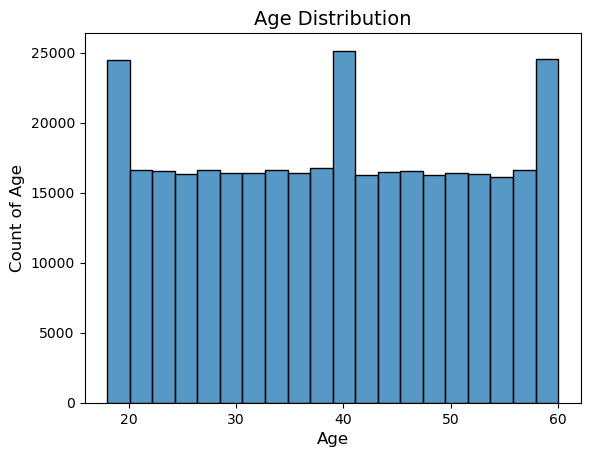

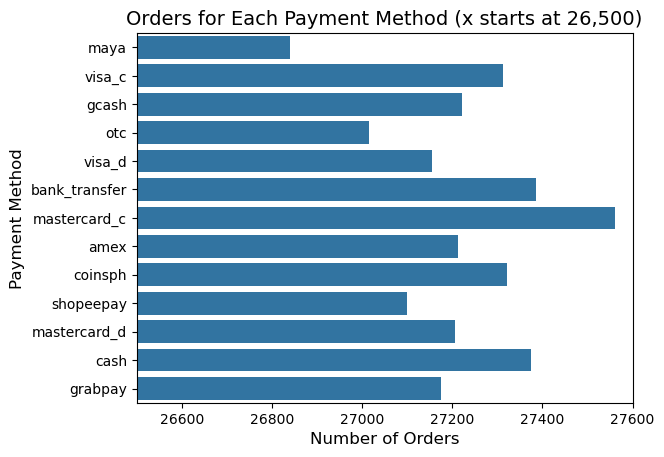

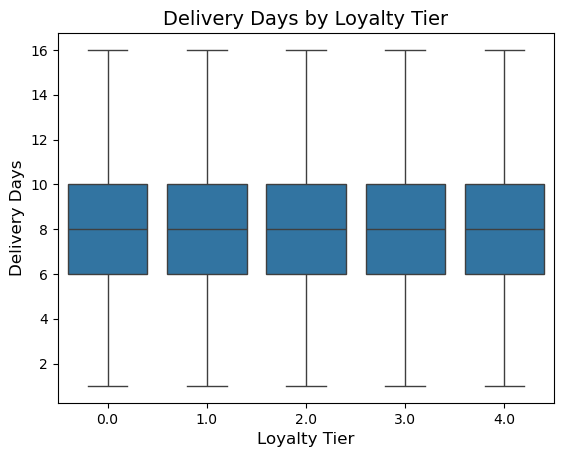

In [37]:
# Age Distribution
sns.histplot(df["age"], bins=20)
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count of Age", fontsize=12)
plt.show()

# Orders for each payment method
sns.countplot(y="payment_method", data=df)
plt.xlim(26500,27600)
plt.title("Orders for Each Payment Method (x starts at 26,500)", fontsize=14)
plt.ylabel("Payment Method", fontsize=12)
plt.xlabel("Number of Orders", fontsize=12)
plt.show()

# Delivery Days by Loyalty Tier
sns.boxplot(x="loyalty_tier", y="delivery_days", data=df)
plt.title("Delivery Days by Loyalty Tier", fontsize=14)
plt.xlabel("Loyalty Tier", fontsize=12)
plt.ylabel("Delivery Days", fontsize=12)
plt.show()

In [38]:
# Count AVG Delivery Time
avg_delivery = df["total_delivery_days"].mean()
print("AVG Delivery Time:",avg_delivery, "\n")

# Delay Rate %
delay_rate = (df["estimated_vs_actual"] > 0).mean() * 100
print("Delay Rate %:", delay_rate, "\n")

# Total Sales After Discount
total_sales = df["total_purchase_after_discount"].sum()
print("Total Sales After Discount:", total_sales, "\n")

AVG Delivery Time: 7.521002704283619 

Delay Rate %: 35.912999494183104 

Total Sales After Discount: 1667841498.1399999 



In [39]:
# Save Data to New csv file (Data_Proceesing)
df.to_csv("Data_Processing.csv", index=False)